In [ ]:
import numpy as np
np.set_printoptions(threshold = np.nan, linewidth = 115)
import pickle
import keras
from keras import models, optimizers, layers, regularizers, metrics
from keras.models import model_from_json
import matplotlib.pyplot as plt
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config = config)

IMG_SIZE = 256

# Save Comparison model
def save_model(model_name):
    model_str = str(input("Save model as: "))

    # serialize model to JSON
    model_name = model.to_json()
    with open("CNN Models/" + model_str + ".json", "w") as json_file:
        json_file.write(model_name)

    # serialize weights to HDF5
    model.save_weights("CNN Models/" + model_str + ".h5")
    print("Saved " + model_str + " and weights to CNN Models folder")
    
# Load model architecture and weights NOTE: must compile again
def load_model():
    model_str = str(input("Name of model to load: "))

    # load json and create model
    json_file = open('CNN Models/' + model_str + '.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("CNN Models/" + model_str + ".h5")
    print("Loaded " + model_str + " and weights from CNN Models folder")
    
    return loaded_model

# Write history object to a file using pickle
def save_history(model_name):
    hist_str = str(input("Save history as: "))

    pickle.dump(model_name.history, open('Training Histories/'+ hist_str + '.p', 'wb'))
    
    print("Saved " + hist_str + " to Training Histories folder")
    
# Load history object
def load_history():
    hist_str = str(input("Name of history to load: "))

    loaded_history = pickle.load(open('Training Histories/' + hist_str + '.p', 'rb'))
    
    print("Loaded " + hist_str + " from Training Histories folder")
    
    return loaded_history

test_labels = pickle.load(open('onehot_test_labels.p', 'rb'))
test_images = pickle.load(open('onehot_test_images.p', 'rb'))
training_labels = pickle.load(open('onehot_training_labels.p', 'rb'))
print(test_labels.shape)
print(test_images.shape)
print(training_labels.shape)

In [2]:
training_images_1 = pickle.load(open('onehot_training_images.p', 'rb'))
training_images_2 = pickle.load(open('onehot_training_images_2.p', 'rb'))
training_images_3 = pickle.load(open('onehot_training_images_3.p', 'rb'))
training_images_4 = pickle.load(open('onehot_training_images_4.p', 'rb'))
training_images_5 = pickle.load(open('onehot_training_images_5.p', 'rb'))

In [3]:
training_images = np.append(training_images_1 , np.append(training_images_2 , np.append(training_images_3 , np.append(training_images_4 , training_images_5 , axis = 0) , axis = 0) , axis = 0) , axis = 0)
print(training_images.shape)

(127380, 256, 256, 1)


# Vanilla ConvNets
### One-Hot Baseline

In [ ]:
# Baseline Model for New One-Hot Encoded Data
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(15, activation='softmax'))

#model.summary()

model.compile(optimizer = optimizers.RMSprop(lr = 1e-5), loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [5]:
onehot_baseline_history = model.fit(training_images, training_labels, epochs = 30, validation_split = 0.1, batch_size = 128, verbose = 1)

'''
onehot_baseline
 history: onehot_baseline_history
   model: onehot_baseline_30e
'''

Train on 114642 samples, validate on 12738 samples
Epoch 1/30
114642/114642 [==============================] - 211s 2ms/step - loss: 5.1495 - categorical_accuracy: 0.3589 - val_loss: 2.1732 - val_categorical_accuracy: 0.3880
Epoch 2/30
114642/114642 [==============================] - 206s 2ms/step - loss: 2.0525 - categorical_accuracy: 0.4040 - val_loss: 2.0653 - val_categorical_accuracy: 0.3898
Epoch 3/30
114642/114642 [==============================] - 205s 2ms/step - loss: 1.9604 - categorical_accuracy: 0.4211 - val_loss: 2.0084 - val_categorical_accuracy: 0.3974
Epoch 4/30
114642/114642 [==============================] - 206s 2ms/step - loss: 1.9207 - categorical_accuracy: 0.4261 - val_loss: 1.9782 - val_categorical_accuracy: 0.4001
Epoch 5/30
114642/114642 [==============================] - 207s 2ms/step - loss: 1.8956 - categorical_accuracy: 0.4296 - val_loss: 1.9738 - val_categorical_accuracy: 0.3993
Epoch 6/30
114642/114642 [==============================] - 213s 2ms/step - los

'\nonehot_baseline\n history: onehot_baseline_history\n   model: onehot_baseline_30e\n'

In [6]:
save_history(onehot_baseline_history)
save_model(onehot_baseline_history)

Save history as: onehot_baseline_history
Saved onehot_baseline_history to Training Histories folder
Save model as: onehot_baseline_30e
Saved onehot_baseline_30e and weights to CNN Models folder


In [8]:
# Load baseline history
base_hist = load_history()

model_history = load_history()

Name of history to load: onehot_baseline_history
Loaded onehot_baseline_history from Training Histories folder
Name of history to load: base_history_30e
Loaded base_history_30e from Training Histories folder


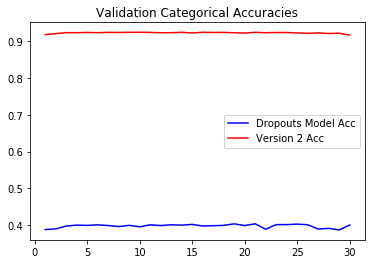

<Figure size 432x288 with 0 Axes>

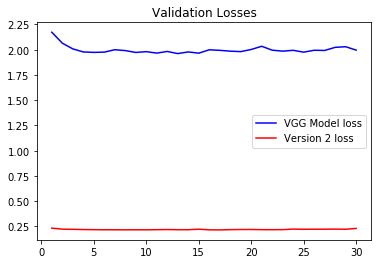

<Figure size 432x288 with 0 Axes>

In [11]:
# Plot Results Compared To Baseline
base_acc = base_hist['val_categorical_accuracy']
model_acc = model_history['val_categorical_accuracy']
epochs = range(1, len(model_acc) + 1)
plt.plot(epochs, base_acc, 'b', label='Dropouts Model Acc')
plt.plot(epochs, model_acc, 'r', label='Version 2 Acc')
plt.title('Validation Categorical Accuracies')
plt.legend()
plt.figure()

plt.show()
# Optional: save plot
#Todo

base_loss = base_hist['val_loss']
model_loss = model_history['val_loss']
plt.plot(epochs, base_loss, 'b', label='VGG Model loss')
plt.plot(epochs, model_loss, 'r', label='Version 2 loss')
plt.title('Validation Losses')
plt.legend()
plt.figure()

# Optional: save plot
#Todo

plt.show()

In [12]:
# Predict
pred = model.predict(test_images)

pred = pred.astype(dtype = 'int32')

# Metric Analysis

ft = pred == test_labels

acc = []

counter = 0
while counter < len(ft):
    if sum(ft[counter]) < 15:
        acc.append(0)
        counter += 1
    else:
        acc.append(1)
        counter += 1
        
# Accuracy       
Acc = (sum(acc)/len(acc)) * 100

print('\t Complete Label Accuracy: ', Acc, '%')

print('Sum of Fully Correct Predictions: ', sum(acc))
print('\t\t    Total Labels: ', len(acc))

if Acc == 0:
    print('\nFeels Devastating (ﾉಥ益ಥ）ﾉ ┻━┻')
    
elif Acc > 0 and Acc < 50:
    print('\nFeels Awful (੭ ˃̣̣̥ ㅂ˂̣̣̥)੭ु')
    
elif Acc >= 50 and Acc < 60:
    print('\nFeels Bad (⌯˃̶᷄ ﹏ ˂̶᷄⌯)')
    
elif Acc >= 60 and Acc < 70:
    print('\nFeels Meh... ┬─┬ノ(ಠ_ಠノ)')

elif Acc >= 70 and Acc < 80:
    print('\nFeels Ok ʕ ·㉨·ʔ')

elif Acc >= 80 and Acc < 90:
    print('\nFeels Better (^._.^)ﾉ')
    
elif Acc >= 90 and Acc < 95:
    print('\nFeels Hopeful ( •́ ⍨ •̀)')
    
elif Acc >= 95 and Acc < 98:
    print('\nFeels Good ヽ|･ω･|ゞ')
    
elif Acc >= 98:
    print('\nFeels Great! ᕙ( * •̀ ᗜ •́ * )ᕗ')

	 Complete Label Accuracy:  0.0 %
Sum of Fully Correct Predictions:  0
		    Total Labels:  14157
Feels Devastating (ﾉಥ益ಥ）ﾉ ┻━┻


In [19]:
pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0,